<a href="https://colab.research.google.com/github/AshwinRamteke1/Myfiles/blob/main/Aerofit_Business_Case_ASR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Aerofit Business Case : Problem Statement

#  About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

Its origins to M/s. Sachdev Sports Co , established in 1928 by Ram Ratan Sachdev . From its modest beginnings in Hyderabad , India, the company evolved into a leading sports equipment supplier across Andhra Pradesh and Telangana. Recognizing the growing need for fitness solutions, M/s. Sachdev Overseas emerged to import quality fitness equipment under the "Aerofit" brand, ensuring affordability and post-sales excellence.
Driven by a dedication to innovation, Nityasach Fitness Pvt Ltd was founded, spearheaded by director Nityesh Sachdev . With the brand "Aerofit" at its core, the company aimed to bridge the gap between international fitness technology and the Indian market. By importing advanced fitness equipment at accessible price points, Aerofit
sought to redefine the industry landscape, prioritizing health and vitality while staying true to its legacy of passion and customer focus.
Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

#The Business Objective:

- 1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- 2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# Dataset Description:
- The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:-

  - Product Purchased:	KP281, KP481, or KP781 :  These are Product Portfolio or three different product categories.:-
  -- The KP281 is an entry-level treadmill that sells for USD 1500
  -- The KP481 is for mid-level runners that sell for USD 1750
  -- The KP781 treadmill is having advanced features that sell for USD 2500
  - Age:	Customer Age in years
  - Gender:	Customer gender Male/Female
  - Education:Customer education in years
  - MaritalStatus:	customer/user marital status Single or partnered
  - Usage:	The average number of times the customer plans to use the treadmill each week.
  - Income:	Annual income of customer(in $)
  - Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
  - Miles:	The average number of miles the customer expects to walk/run each week

# Defining Problem Statement and Analysing basic metrics:
- Objective: Identify Characteristics of Target Customers
- Purpose: Improve and Provide better treadmill recommendations to new  new customers.
- Task: Identify characteristics of the target customers for each treadmill type.



In [2]:
# Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the given dataset of Aerofit

In [5]:
df=pd.read_csv('/content/aerofit_treadmill.csv')

In [6]:
# checking the dataset attributes and values

In [7]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [8]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [9]:
# Shape of the dataset
df.shape

(180, 9)

In [10]:
# checking the datatypes of all attributes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [11]:
# Checking the statistical summery of the dataset
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [12]:
# checking the null count of the attributes
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Observations:-
- 1. There are 180 rows and 9 attributes are present in the dataset.
- 2. The dataset mostly consists of numerical values in attributes except the Product, Gender, MaritalStatus which are the object type.
- 3.  These Object data type may be convert to numerical datatype as if required.
- 4.  This data set is having mostly the customers information and the product bought by customer.
- 5. These is no any null vlaue prsent in the dataset

# Non-Graphical Analysis: Value counts and unique attributes

In [13]:
# finding the column names

In [14]:
column_list=df.columns
column_list

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [15]:
# finding the number of unique values of attributes

In [16]:
unique_nos={}
for i in df.columns:
  unique_nos[i]=df[i].nunique()
print(unique_nos)

{'Product': 3, 'Age': 32, 'Gender': 2, 'Education': 8, 'MaritalStatus': 2, 'Usage': 6, 'Fitness': 5, 'Income': 62, 'Miles': 37}


In [17]:
print(unique_nos)
pd.DataFrame([unique_nos])       # this is crating the dataframe in a single row format

{'Product': 3, 'Age': 32, 'Gender': 2, 'Education': 8, 'MaritalStatus': 2, 'Usage': 6, 'Fitness': 5, 'Income': 62, 'Miles': 37}


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,3,32,2,8,2,6,5,62,37


In [18]:
# this is creats in the dataframe as
df1 = pd.DataFrame(list(unique_nos.items()), columns=['Attribute', 'Unique_Count'])
df1

,Attribute,Unique_Count
0,Product,3
1,Age,32
2,Gender,2
3,Education,8
4,MaritalStatus,2
5,Usage,6
6,Fitness,5
7,Income,62
8,Miles,37


In [19]:
# checking the unique value counts of the attributes

In [20]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [21]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [22]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [23]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [24]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [25]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [26]:
df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [27]:
# Performing Income analysis of customers/users

In [28]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [29]:
df['Income'].max()

104581

In [30]:
df['Income'].min()

29562

In [31]:
income=df['Income'].tolist()
income

[29562,
 31836,
 30699,
 32973,
 35247,
 32973,
 35247,
 32973,
 35247,
 37521,
 36384,
 35247,
 36384,
 35247,
 38658,
 40932,
 34110,
 39795,
 38658,
 34110,
 38658,
 40932,
 42069,
 44343,
 45480,
 42069,
 46617,
 48891,
 45480,
 53439,
 39795,
 40932,
 40932,
 43206,
 44343,
 52302,
 53439,
 51165,
 36384,
 44343,
 50028,
 45480,
 54576,
 45480,
 46617,
 52302,
 52302,
 54576,
 54576,
 51165,
 68220,
 46617,
 50028,
 46617,
 54576,
 54576,
 45480,
 46617,
 52302,
 55713,
 46617,
 51165,
 52302,
 48891,
 60261,
 67083,
 44343,
 37521,
 46617,
 54576,
 52302,
 56850,
 59124,
 61398,
 54576,
 53439,
 57987,
 60261,
 56850,
 64809,
 31836,
 32973,
 34110,
 38658,
 34110,
 34110,
 32973,
 36384,
 38658,
 45480,
 45480,
 43206,
 40932,
 45480,
 40932,
 48891,
 50028,
 45480,
 43206,
 52302,
 47754,
 45480,
 43206,
 45480,
 43206,
 50028,
 45480,
 48891,
 45480,
 50028,
 51165,
 45480,
 51165,
 57987,
 46617,
 52302,
 51165,
 65220,
 60261,
 53439,
 53439,
 50028,
 51165,
 53439,
 47754,


In [32]:
# let say I wil categorised the income values in to the income slabs as below based on the US tax brackets.
# 1. < 40K                     Low Income    ( As in 12% Tax bracket)
# 2. => 40K and  <=50K          Middle Income ( As in 22% Tax bracket)
# 3. > 50K and  <=60K          Middle Income ( As in 22% Tax bracket)
# 4. > 60K and  <=70K          Middle Income ( As in 22% Tax bracket)
# 5. > 70K and  <=80K          Middle Income ( As in 22% Tax bracket)
# 6. > 80K and  <=90K          Middle Income ( As in 22% Tax bracket)
# 7. > 90K and  <=100K         High Income   ( As in above 24% Tax bracket)
# 8. > 100K                    High Income   ( As in above 24% Tax bracket)

In [33]:
count40K=0     # This is count of customers having income <=40K
count50K=0     # This is count of customers having income > 40K and  <=50K
count60K=0     # This is count of customers having income > 50K and  <=60K
count70K=0     # This is count of customers having income > 60K and  <=70K
count80K=0     # This is count of customers having income > 70K and  <=80K
count90K=0     # This is count of customers having income > 80K and  <=90K
count100K=0    # This is count of customers having income > 90K and  <=100K
count101K=0    # This is count of customers having income > 100K

for i in income:
    if i < 40000:
      count40K += 1
    elif 40000 <= i <= 50000:
      count50K += 1
    elif 50000 < i <= 60000:
      count60K += 1
    elif 60000 < i <= 70000:
      count70K += 1
    elif 70000 < i <= 80000:
      count80K += 1
    elif 80000 < i <= 90000:
      count90K+= 1
    elif 90000 < i <= 100000:
      count100K+=1
    else:
      count101K += 1

print('Number of customers having income <40K : ', count40K)
print('Number of customers having income >= 40K and  <=50K : ', count50K)
print('Number of customers having income > 50K and  <=60K : ', count60K)
print('Number of customers having income > 60K and  <=70K: ', count70K)
print('Number of customers having income > 70K and  <=80K :', count80K)
print('Number of customers having income > 80K and  <=90K :', count90K)
print('Number of customers having income > 90K and  <=100K :',count100K)
print('Number of customers having income > 100K : ', count101K)

Number of customers having income <40K :  32
Number of customers having income >= 40K and  <=50K :  51
Number of customers having income > 50K and  <=60K :  55
Number of customers having income > 60K and  <=70K:  19
Number of customers having income > 70K and  <=80K : 4
Number of customers having income > 80K and  <=90K : 7
Number of customers having income > 90K and  <=100K : 9
Number of customers having income > 100K :  3


In [34]:
(12/180)*100

6.666666666666667

In [35]:
# Performing age analysis of customers/users

In [36]:
df['Age'].min()

18

In [37]:
df['Age'].max()

50

In [38]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [39]:
age=df['Age'].tolist()


In [40]:
type(age)

list

In [41]:
# Here I consider the different age slabs of customers
#1. age<= 25 Y
#2. 25 < age <= 30
#3. 30 < age <= 35
#4. 35 < age <= 40
#5. 40 < age <=45
#6. 45 < age

In [42]:
count25=0     # This is count of customers below or equal to 25 years of age
count30=0     # This is count of customers above 25 to 30 years
count35=0     # This is count of customers above 30  to 35 years
count40=0     # This is count of customers above 35  to 40 years
count45=0     # This is count of customers above 40  to 45 years
count50=0     # This is count of customers above 45 years

for i in age:
    if i <= 25:
      count25 += 1
    elif 25 < i <= 30:
      count30 += 1
    elif 30 < i <= 35:
      count35 += 1
    elif 35 < i <= 40:
      count40 += 1
    elif 40 < i <=45:
      count45 += 1
    else:
        count50 += 1

print('Number of customers/users <= 25 Y age are : ', count25)
print('Number of customers/users above 25 to 30 Y age : ', count30)
print('Number of customers/users above 30 to 30 Y age : ', count35)
print('Number of customers/users above 35 to 40 Y age : ', count40)
print('Number of customers/users above 40 to 45 Y age  :', count45)
print('Number of customers/users above 45 Y age : ', count50)

Number of customers/users <= 25 Y age are :  79
Number of customers/users above 25 to 30 Y age :  41
Number of customers/users above 30 to 30 Y age :  32
Number of customers/users above 35 to 40 Y age :  16
Number of customers/users above 40 to 45 Y age  : 6
Number of customers/users above 45 Y age :  6


# Observations:-
- 1. It is clear from the dataset that there are only 3 different types of trademills sold here.
- 2. The age customers using the trademill varies from 18 Years to 50 Years. Average customer/user age is 29 years.Most of the customers are of young ages.
- 3. Around 44 % customers/users are of age <= 25 Years i.e. Youth population, around 50 % customers/users are Adults (i.e. in the age ragne above 25 to 40), around only 6 % customers are middle aged ( i.e. above 40).
- 4. It is observed that the customer/user numbers are decreased comparing with increase in age.  So Majority of customers are Youth and Adults.
- 5. Around 60 % customers/users who bought trademill are married.
- 6. Around 58 % customers/users are Men.
- 7. Around 53 % customers/users have Averge fitness as per self assessment i.e. they may habve good endurance, healthy cardiovascular function, decent strength and flexibility, and engage in a variety of physical activities. May be thse customers are health concious and may be aiming to keep themselfes healthy and fit.
- 8. Around 17 % customers/users have High Fitness as per self assessment. They have Exceptional endurance, Outstanding cardiovascular health, Superior strength and flexibility and  perform at an elite level in various physical activities.  May be these customers are highly health concious , fitness enthuastics, they may be from some sports background where they are expecting to build and keep excellent physcial fitness.  These cusotmers may be consider as Elite customers if they are found buyers of the Advanced feature Trademill.
- 9. Around 38 % customers/users which is max count, planed to use the trademill trice a week. That is maximum customers plan to use the trademill 3 times a week.
- 10.  Around 15 % people (this is max count) expected to complete average 85 Miles walk/run each week.
- 11.  There are very few customers/users expected to complete above 200 miles walk/run each week.
- 12. Around 18 % customers are from Lower Income slab (Income < = 40K)
- 13. Around 59 % customers are from Middle Income ( With starting Range 40K to 60K) slab.
- 14. Around 17 % customers are from Middle Income (With higher Range 60K to 90K )
- 15. Only 7 % customers are from High Income slab.

# Visual Analysis - Univariate & Bivariate

- For continuous variable(s): Distplot, countplot, histogram for univariate analysis
- For categorical variable(s): Boxplot
- For correlation: Heatmaps, Pairplots

###Univariate Analysis

##### 1. Product Sales Distribution

In [43]:
x=df['Product'].unique()
x

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [44]:
df.groupby('Product').ngroups   # This will give number of groups possible by Product type/Product model

3

In [45]:
df.groupby('Product').groups   # This will give list of groups

{'KP281': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 'KP481': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], 'KP781': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]}

In [46]:
x=df['Product'].value_counts()
x

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [47]:
df1=df['Product'].value_counts().reset_index().rename(columns={'index': 'Product', 'Product': 'Count'})
df1

,Product,Count
0,KP281,80
1,KP481,60
2,KP781,40


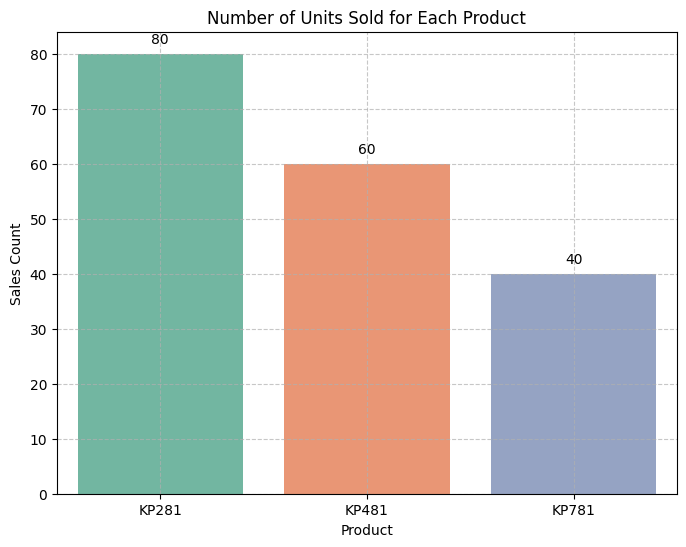

In [48]:
# plotting the countplot to get count of each product sold.

plt.figure(figsize= (8,6))
ax=sns.countplot(x="Product", data=df, palette="Set2",hue="Product")
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show gridlines
ax.grid(axis='both', linestyle='--', alpha=0.7)
plt.title("Number of Units Sold for Each Product")
plt.xlabel('Product')
plt.ylabel('Sales Count')
plt.show()

In [49]:
df1['Unit_Price']=[1500,1750,2500]
df1['Total_Sales']=df1['Count']*df1['Unit_Price']
df1

,Product,Count,Unit_Price,Total_Sales
0,KP281,80,1500,120000
1,KP481,60,1750,105000
2,KP781,40,2500,100000


# Observations:-
- The KP281 treadmill model, positioned as an entry-level product, has the highest number of units sold, trailed by the KP481 (mid-level) and KP781 (advanced) models.
- All three models have nearly equal contributions in terms of generating sales revenue.

##### 2. Gender and Marital Status Disribution

In [50]:
df[['Product','Gender','MaritalStatus']]

,Product,Gender,MaritalStatus
0,KP281,Male,Single
1,KP281,Male,Single
2,KP281,Female,Partnered
3,KP281,Male,Single
4,KP281,Male,Partnered
...,...,...,...
175,KP781,Male,Single
176,KP781,Male,Single
177,KP781,Male,Single
178,KP781,Male,Partnered


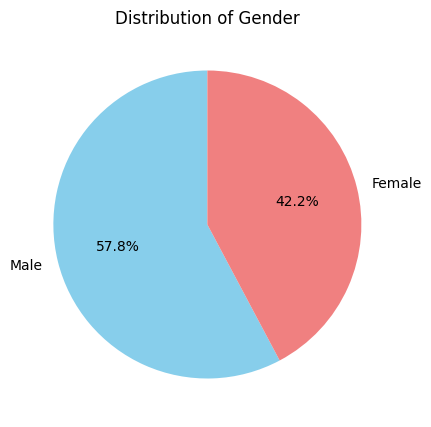

In [51]:
gender=df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.show()

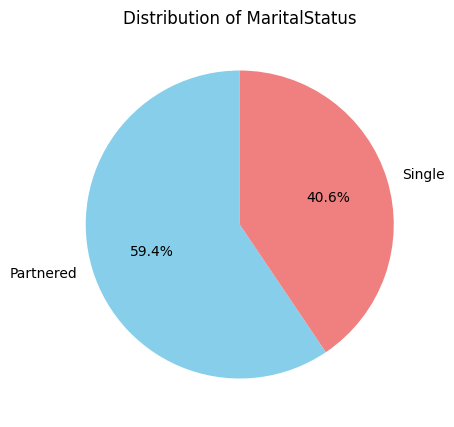

In [52]:
marrry=df['MaritalStatus'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(marrry, labels=marrry.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of MaritalStatus')
plt.show()

In [53]:
df2=df.groupby(['Product', 'MaritalStatus']).size().reset_index(name='Count') # To get cunt of customers for respective product Maritalstatus wise
df2

,Product,MaritalStatus,Count
0,KP281,Partnered,48
1,KP281,Single,32
2,KP481,Partnered,36
3,KP481,Single,24
4,KP781,Partnered,23
5,KP781,Single,17


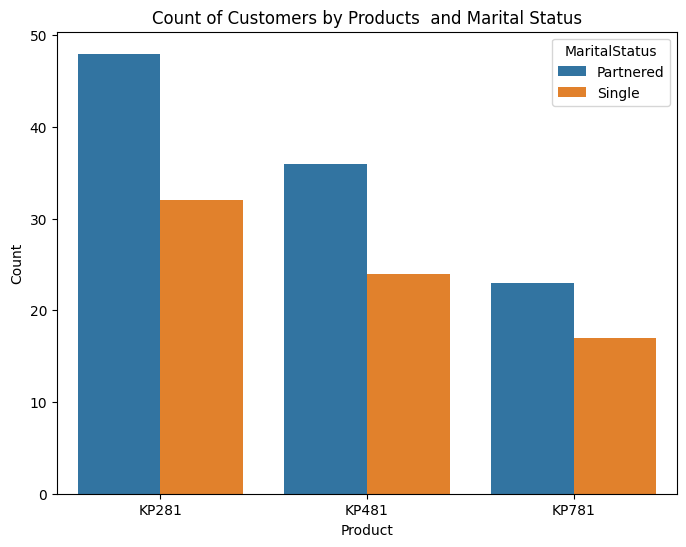

In [54]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Product', y='Count', hue='MaritalStatus', data=df2)

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Count of Customers by Products  and Marital Status')

# Show the plot
plt.show()

In [55]:
df3=df.groupby(['Product', 'Gender']).size().reset_index(name='Count') # To get cunt of customers for respective product Gender wise
df3

,Product,Gender,Count
0,KP281,Female,40
1,KP281,Male,40
2,KP481,Female,29
3,KP481,Male,31
4,KP781,Female,7
5,KP781,Male,33


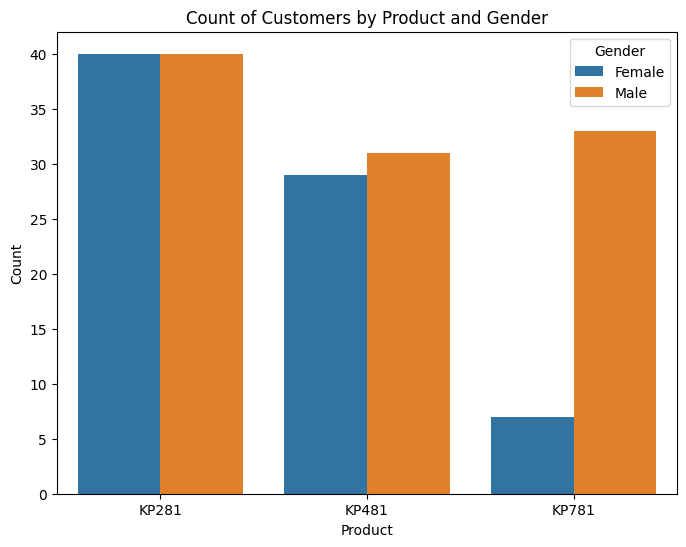

In [56]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Product', y='Count', hue='Gender', data=df3)
# Add labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Count of Customers by Product and Gender')

# Show the plot
plt.show()

###Observations:-
- 1. Among the buyers 58 % are Male and 42 % ae Female buyers.
- 2. 59 % buyers are Married and 41 % buyers are single.
- 3. For every product type Married buyers are more compared to singles.
- 4. Product KP281( Entry Level) is equally liked by Men and Womens buyers.
- 5. Product KP481( Mid range) is more liked by Male customers.
- 6. Product KP781( Advanced ) is highly appreciated by the Male customers. 0.82 is the probability of buying KP781 by Male users.
- 7. For Advanced feature product womens buyers are very less.

3. Fitness and Treadmill Usage

In [57]:
df[['Usage','Fitness']]

,Usage,Fitness
0,3,4
1,2,3
2,4,3
3,3,3
4,4,2
...,...,...
175,6,5
176,5,4
177,5,5
178,4,5


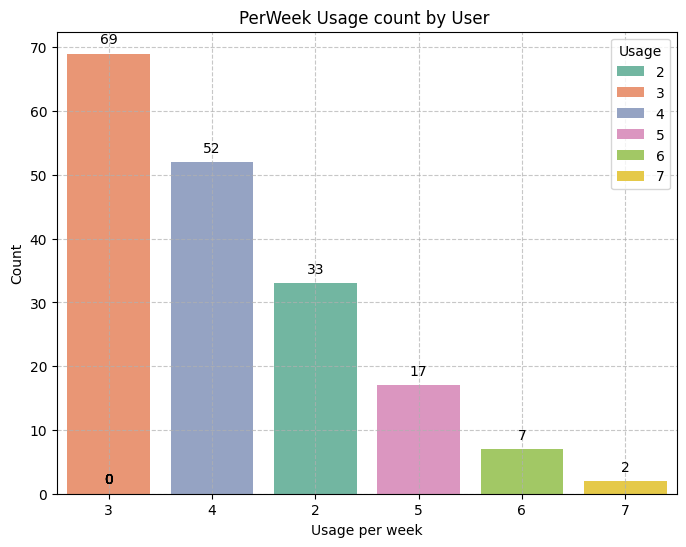

In [58]:
# plotting the countplot to get count for Usage per week.

plt.figure(figsize= (8,6))
ax=sns.countplot(x="Usage", data=df, palette="Set2",hue="Usage",order=df['Usage'].value_counts().index)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show gridlines
ax.grid(axis='both', linestyle='--', alpha=0.7)
plt.title("PerWeek Usage count by User ")
plt.xlabel('Usage per week')
plt.ylabel('Count')
plt.show()

In [59]:
use=df['Usage'].value_counts()
use.index

Int64Index([3, 4, 2, 5, 6, 7], dtype='int64')

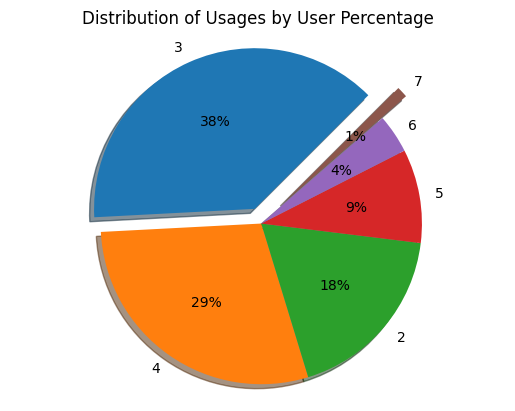

In [60]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = use.index
explode = (0.1,0, 0, 0, 0,0.2)  # only "explode" 1st and last slice

plt.pie(use, explode=explode, labels=use.index, autopct='%1.0f%%',shadow=True, startangle=45)
#plt.pie(use, labels=use.index, autopct='%1.0f%%', startangle=90)
plt.title('Distribution of Usages by User Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

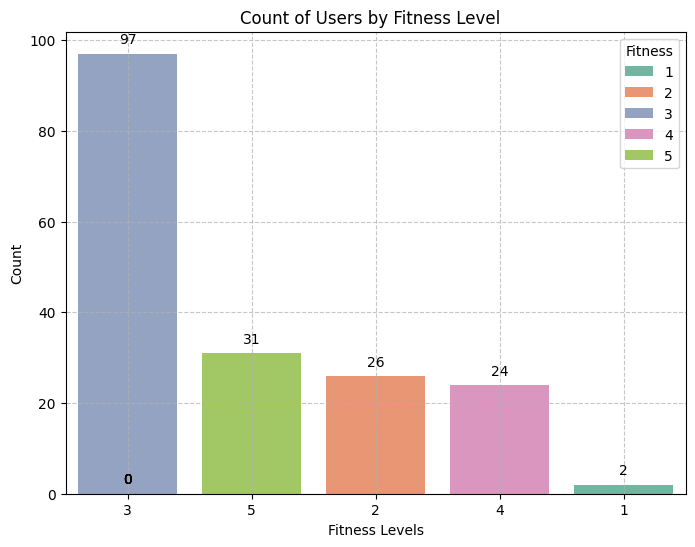

In [61]:
# plotting the countplot to get count for Fitness Level of customers.

plt.figure(figsize= (8,6))
ax=sns.countplot(x="Fitness", data=df, palette="Set2",hue="Fitness",order=df['Fitness'].value_counts().index)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show gridlines
ax.grid(axis='both', linestyle='--', alpha=0.7)
plt.title("Count of Users by Fitness Level  ")
plt.xlabel('Fitness Levels')
plt.ylabel('Count')
plt.show()

In [62]:
fit=df['Fitness'].value_counts()
fit.index

Int64Index([3, 5, 2, 4, 1], dtype='int64')

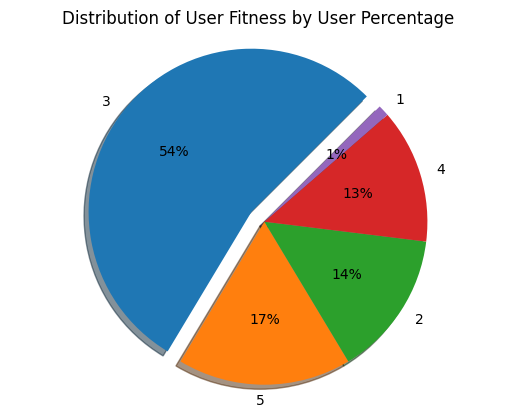

In [63]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = fit.index
explode = (0.1,0, 0, 0, 0)  # only "explode" 1st and last slice

plt.pie(fit, explode=explode, labels=fit.index, autopct='%1.0f%%',shadow=True, startangle=45)
#plt.pie(use, labels=use.index, autopct='%1.0f%%', startangle=90)
plt.title('Distribution of User Fitness by User Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

###Observations:-
- 1. Almost 85% of the customers plan to use the treadmill for 2 to 4 times a week and only 15% using 5 times and above each week
54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5.
- 2. Furthermore, a substantial 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.

4. Customer Age Distribution

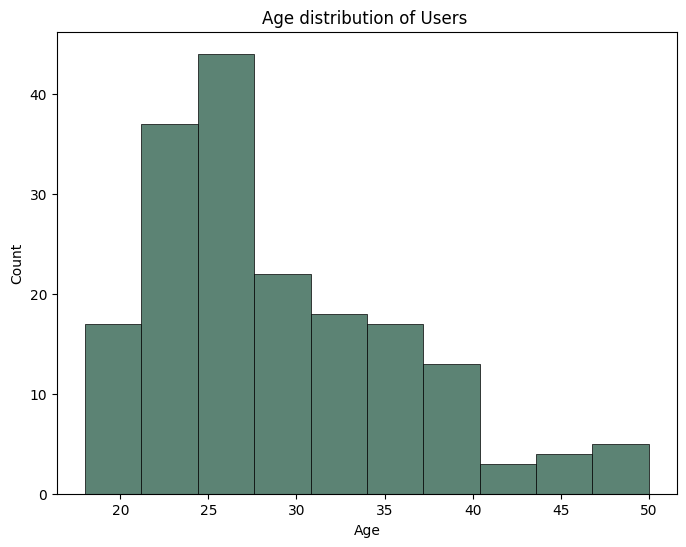

In [64]:
plt.figure(figsize= (8,6))
plt.hist(df['Age'],color= '#5C8374',linewidth=0.5,edgecolor='black')
#plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.title("Age distribution of Users ")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [65]:
# Categorizing the values in age column in 4 different buckets:
# Young Adult: from 18 - 25
# Adults: from 26 - 35
# Middle Aged Adults: 36-45
# Elder :46 and above

In [66]:
# Define the age groups
bins = [18, 25, 35, 45, float('inf')]
labels = ['Young Adult', 'Adult', 'Middle Aged Adult', 'Elder']

# Add a new column 'age_group' based on the specified age ranges
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the DataFrame
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adult
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adult
177,KP781,45,Male,16,Single,5,5,90886,160,Elder
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder


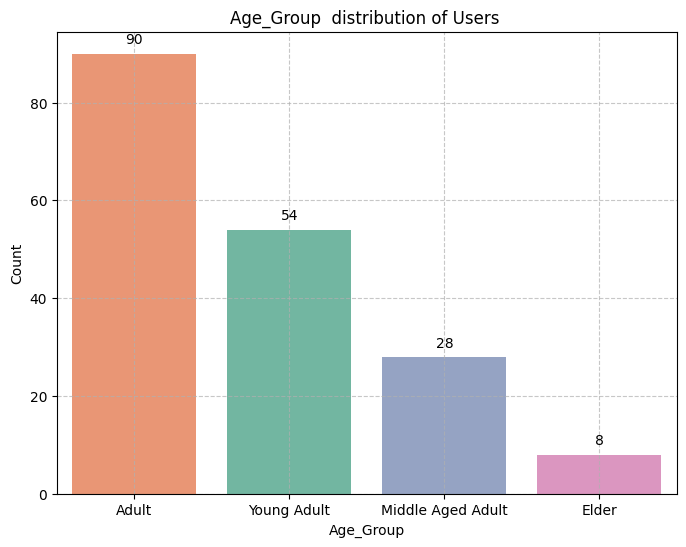

In [67]:
plt.figure(figsize= (8,6))
ax=sns.countplot(x=df["age_group"], data=df, palette="Set2",hue="age_group",order=df['age_group'].value_counts().index)
ax.grid(axis='both', linestyle='--', alpha=0.7)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Age_Group  distribution of Users ")
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.show()

In [68]:
df['Age'].median()  # The median Age of the customers

26.0

####Observations:
- 80% of the customers fall in the age range of 18 to 35. with a median age of 26, suggesting young people showing more interest in the companies products



5 Customer Income Distribution

In [69]:
df_income=df['Income'].tolist()
df_income

df_income_grp=[]                                         # considering the Income Group As
for i in df_income:                                      # Low_Income   < 40K
  if i <=40000:                                           # Moderate  >=40K and <=60 K
    df_income_grp.append('Low_Income')                   # High    > 60K and <= 80 K
  elif i >40000 and i<=60000:                           # Very High   >80K
    df_income_grp.append('Moderate_Income')
  elif i > 60000 and i<=80000:
    df_income_grp.append('High_Income')
  else:
    df_income_grp.append('Very_High_Income')
df_income_grp

['Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Moderate_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Low_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Low_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Low_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'High_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Income',
 'Moderate_Inc

In [70]:
Income_df = pd.DataFrame({'Income': df_income, 'Income_Group': df_income_grp})
Income_df

,Income,Income_Group
0,29562,Low_Income
1,31836,Low_Income
2,30699,Low_Income
3,32973,Low_Income
4,35247,Low_Income
...,...,...
175,83416,Very_High_Income
176,89641,Very_High_Income
177,90886,Very_High_Income
178,104581,Very_High_Income


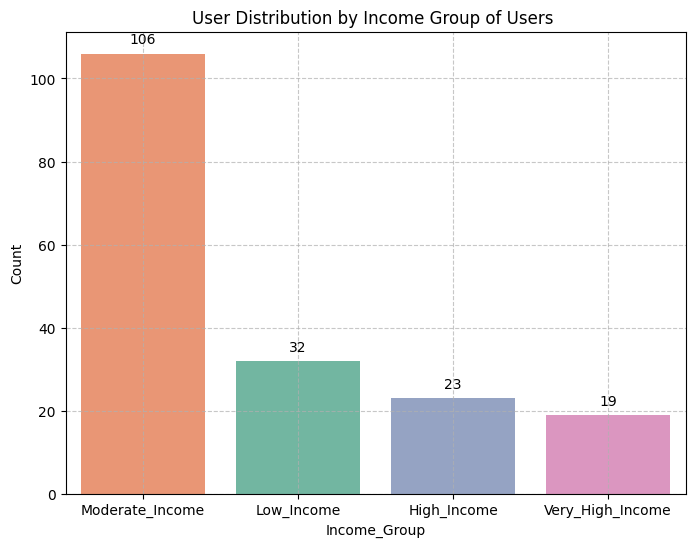

In [71]:
plt.figure(figsize= (8,6))
ax=sns.countplot(x=Income_df["Income_Group"], data=Income_df, palette="Set2",hue="Income_Group",order=Income_df['Income_Group'].value_counts().index)
ax.grid(axis='both', linestyle='--', alpha=0.7)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("User Distribution by Income Group of Users ")
plt.xlabel('Income_Group')
plt.ylabel('Count')
plt.show()

####Observations:
- Almost 60% of the customers fall in the income group of (40k to 60k) dollars suggesting higher inclination of this income group people towards the products.
- Surprisingly 18% of the customers fall in the income group of (<40) suggesting almost 77% of the total customers fall in income group of below 60k and only 23% of them falling in 60k and above income grou


6 Customers Expected Weekly Mileage

In [72]:
df['Miles']

0      112
1       75
2       66
3       85
4       47
      ... 
175    200
176    200
177    160
178    120
179    180
Name: Miles, Length: 180, dtype: int64

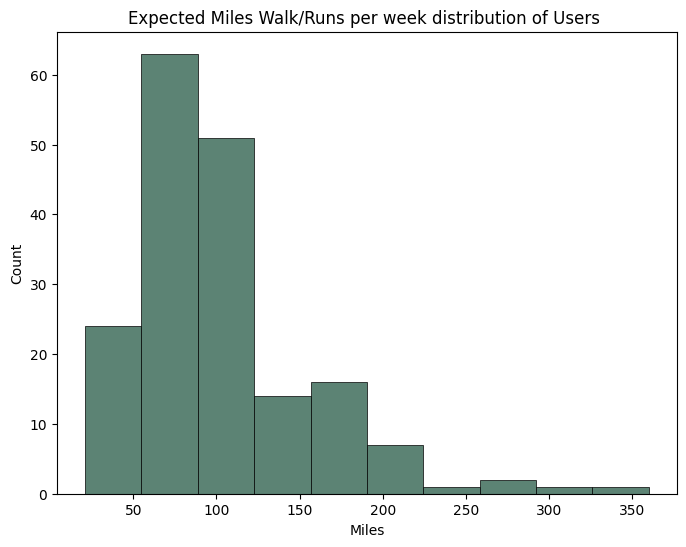

In [73]:
plt.figure(figsize= (8,6))
plt.hist(df['Miles'],color= '#5C8374',linewidth=0.5,edgecolor='black')
#plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.title("Expected Miles Walk/Runs per week distribution of Users ")
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()


In [74]:
# Categorizing the values in Miles column in 4 different buckets:
# 'Light Activity: from 0 - 50
# Moderate Activity: from 51 - 100
# Active Lifestyle: from 101-200
# Fitness Enthusiastics :  200 above

In [75]:
df_miles=df['Miles'].tolist()
df_miles

df_miles_grp=[]                                     # considering the  Miles Group As
for i in df_miles:                                  #Light Activity  <= 50
  if i <50:                                         # Moderate Activity  51 - 100
    df_miles_grp.append('Light Activity')           # Active Lifestyle   101-200
  elif i >=51 and i<=100:                           # Fitness Enthusiastics 200 above
    df_miles_grp.append('Moderate Activity')
  elif i > 100 and i<=200:
    df_miles_grp.append('Active Lifestyle')
  else:
    df_miles_grp.append('Fitness Enthusiastics')
df_miles_grp


['Active Lifestyle',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Light Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Active Lifestyle',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Light Activity',
 'Moderate Activity',
 'Active Lifestyle',
 'Moderate Activity',
 'Active Lifestyle',
 'Light Activity',
 'Active Lifestyle',
 'Moderate Activity',
 'Moderate Activity',
 'Active Lifestyle',
 'Active Lifestyle',
 'Light Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Light Activity',
 'Moderate Activity',
 'Active Lifestyle',
 'Light Activity',
 'Moderate Activity',
 'Active Lifestyle',
 'Active Lifestyle',
 'Light Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Active Lifestyle',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Moderate Activity',
 'Active Lifestyle',

In [76]:
Miles_df = pd.DataFrame({'Miles': df_miles, 'Miles_Group': df_miles_grp})
Miles_df

,Miles,Miles_Group
0,112,Active Lifestyle
1,75,Moderate Activity
2,66,Moderate Activity
3,85,Moderate Activity
4,47,Light Activity
...,...,...
175,200,Active Lifestyle
176,200,Active Lifestyle
177,160,Active Lifestyle
178,120,Active Lifestyle


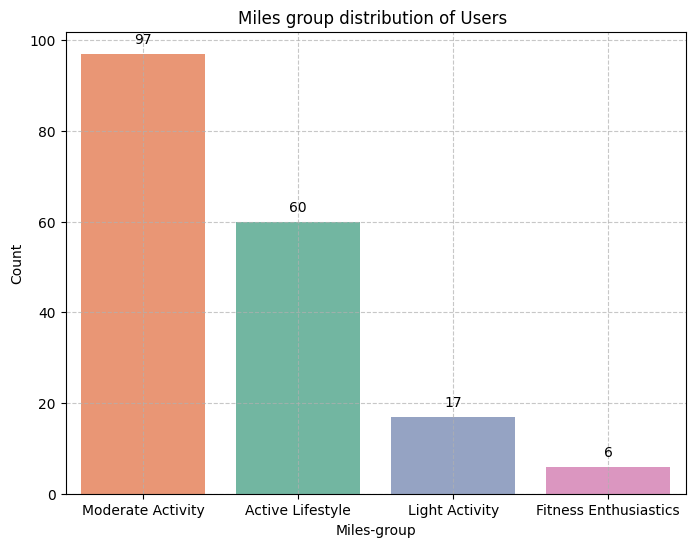

In [77]:
plt.figure(figsize= (8,6))
ax=sns.countplot(x=Miles_df["Miles_Group"], data=Miles_df, palette="Set2",hue="Miles_Group",order=Miles_df['Miles_Group'].value_counts().index)
ax.grid(axis='both', linestyle='--', alpha=0.7)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Miles group distribution of Users ")
plt.xlabel('Miles-group')
plt.ylabel('Count')
plt.show()

In [78]:
Miles_df['Miles'].median()

94.0

####Observations
- Almost 88% of the customers plans to use the treadmill for 50 to 200 miles per week with a median of 94 miles per week.

###Bivariate Analysis

##### 1.  Product Type Analysis

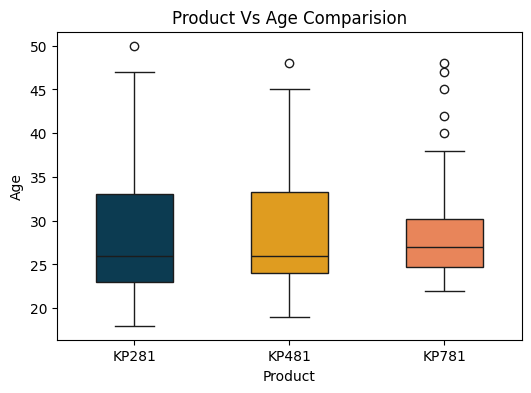

In [79]:
#Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(data = df, x = 'Product',y='Age' ,width = 0.5, hue='Product', palette =["#003f5c", "#ffa600","#ff7c43"])
plt.title('Product Vs Age Comparision')
plt.xlabel('Product')
plt.ylabel('Age')
plt.show()

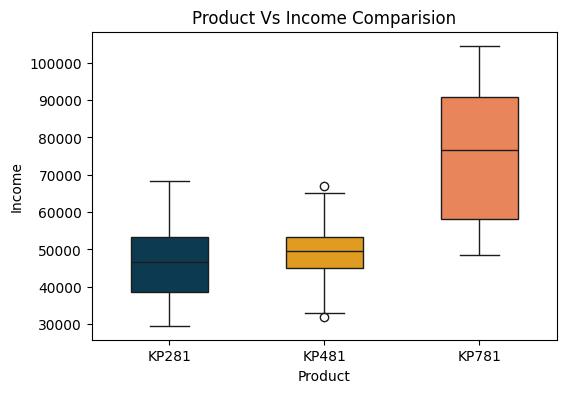

In [80]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = df, x = 'Product',y='Income' ,width = 0.5, hue='Product', palette =["#003f5c", "#ffa600","#ff7c43"])
plt.title('Product Vs Income Comparision')
plt.xlabel('Product')
plt.ylabel('Income')
plt.show()

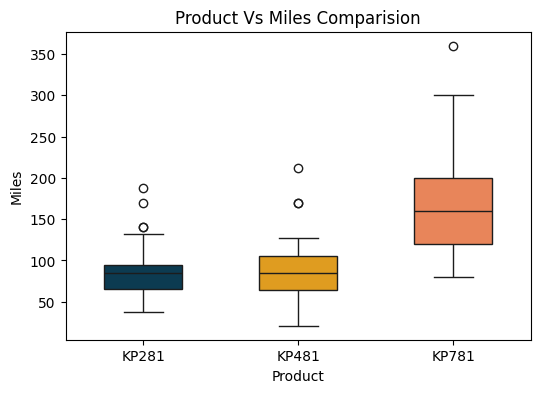

In [81]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = df, x = 'Product',y='Miles' ,width = 0.5, hue='Product', palette =["#003f5c", "#ffa600","#ff7c43"])
plt.title('Product Vs Miles Comparision')
plt.xlabel('Product')
plt.ylabel('Miles')
plt.show()

#### Observations-
- The analysis presented above clearly indicates a strong preference for the treadmill model KP781 among customers who are having higher income levels, and intend to engage in running activities exceeding 150 miles per week.

Product Preferences Across Gender and Marital Status

In [82]:
df4=df.groupby(['Product','MaritalStatus', 'Gender']).size().reset_index(name='Count') # To get cunt of customers for respective product Maritalstatus wise
df4

,Product,MaritalStatus,Gender,Count
0,KP281,Partnered,Female,27
1,KP281,Partnered,Male,21
2,KP281,Single,Female,13
3,KP281,Single,Male,19
4,KP481,Partnered,Female,15
5,KP481,Partnered,Male,21
6,KP481,Single,Female,14
7,KP481,Single,Male,10
8,KP781,Partnered,Female,4
9,KP781,Partnered,Male,19


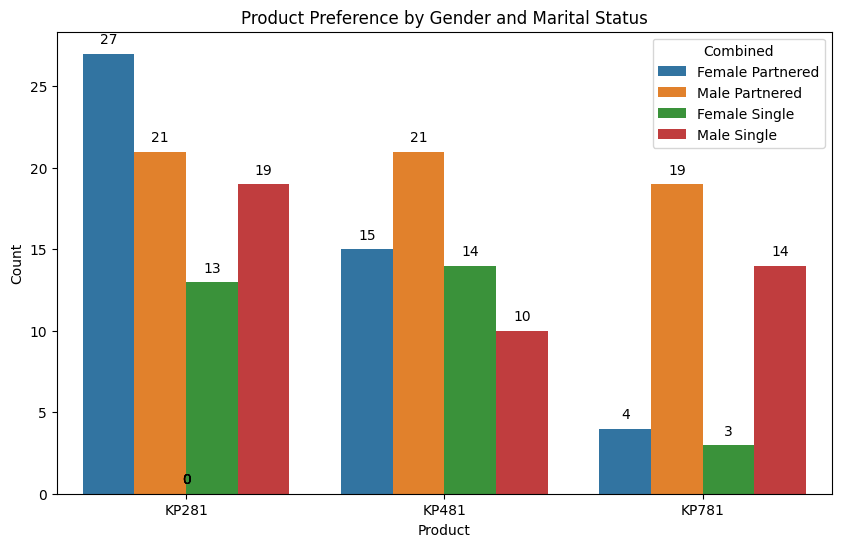

In [83]:
# Create a new variable combining Gender and MaritalStatus

# As multiple hue values can not be processed together directly in the sns.barplot()
# if done like this sns.barplot(x='Product', y='Count', hue=['Gender', 'MaritalStatus'], data=df4)
# this will throw error as
# ValueError: Length of list vectors must match length of `data` when both are used,
# but `data` has length 12 and the vector passed to `hue` has length 2.

df4['Combined'] = df4['Gender'] + ' ' + df4['MaritalStatus']      # Use this approach to combine both hue values and used in the sns.barplot for hue
# Create a bar plot
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Product', y='Count', hue='Combined', data=df4)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product Preference by Gender and Marital Status')
#plt.grid(axis='both', linestyle='--', alpha=0.5)


# Show the plot
plt.show()

Product Preference Across Age Groups

In [84]:
df5=df.groupby(['Product', 'age_group']).size().reset_index(name='Count') # To get cunt of customers for respective product Maritalstatus wise
df5



,Product,age_group,Count
0,KP281,Young Adult,27
1,KP281,Adult,36
2,KP281,Middle Aged Adult,14
3,KP281,Elder,3
4,KP481,Young Adult,17
5,KP481,Adult,31
6,KP481,Middle Aged Adult,10
7,KP481,Elder,2
8,KP781,Young Adult,10
9,KP781,Adult,23


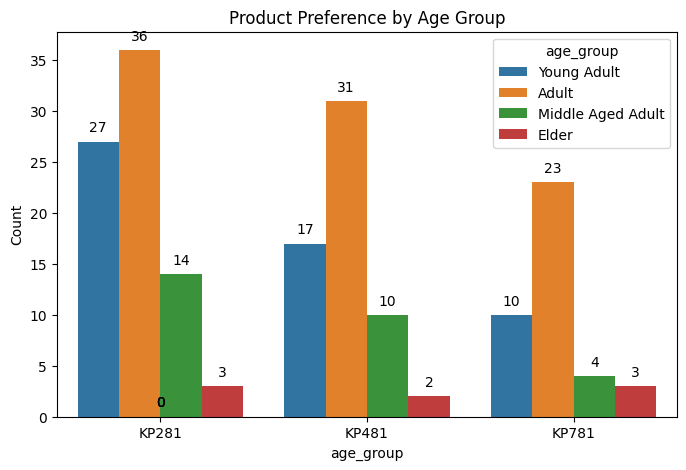

In [85]:

plt.figure(figsize=(8, 5))
ax=sns.barplot(x='Product', y='Count', hue='age_group', data=df5)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('age_group')
plt.ylabel('Count')
plt.title('Product Preference by Age Group')
#plt.grid(axis='both', linestyle='--', alpha=0.5)


# Show the plot
plt.show()

# Young Adult: from 18 - 25
# Adults: from 26 - 35
# Middle Aged Adults: 36-45
# Elder :46 and above

#### Observation:
- treadmills are preferred by the Adults in all three product segments


Product Preference Across Income Group


In [86]:
df_product=df['Product'].tolist()

In [87]:
prod_income = pd.DataFrame({'Product':df_product, 'Income': df_income, 'Income_Group': df_income_grp})
prod_income

,Product,Income,Income_Group
0,KP281,29562,Low_Income
1,KP281,31836,Low_Income
2,KP281,30699,Low_Income
3,KP281,32973,Low_Income
4,KP281,35247,Low_Income
...,...,...,...
175,KP781,83416,Very_High_Income
176,KP781,89641,Very_High_Income
177,KP781,90886,Very_High_Income
178,KP781,104581,Very_High_Income


In [88]:
df6=prod_income.groupby(['Product', 'Income_Group']).size().reset_index(name='Count') # To get cunt of customers for respective product Maritalstatus wise
df6

,Product,Income_Group,Count
0,KP281,High_Income,6
1,KP281,Low_Income,23
2,KP281,Moderate_Income,51
3,KP481,High_Income,7
4,KP481,Low_Income,9
5,KP481,Moderate_Income,44
6,KP781,High_Income,10
7,KP781,Moderate_Income,11
8,KP781,Very_High_Income,19


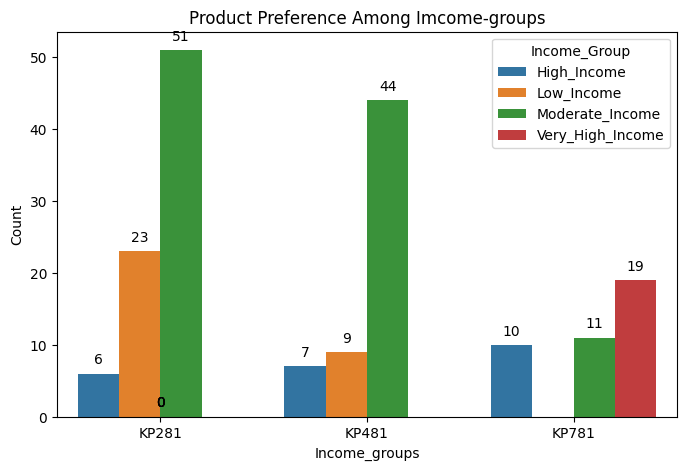

In [89]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(x='Product', y='Count', hue='Income_Group', data=df6)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Income_groups')
plt.ylabel('Count')
plt.title('Product Preference Among Imcome-groups')
#plt.grid(axis='both', linestyle='--', alpha=0.5)


# Show the plot
plt.show()

In [90]:
51/180

0.2833333333333333

#### Observations:
- 1. Treadmill model KP781 is preferred more by customers with Very High Income.
- 2. Both treadmill models, KP481 and KP281, are preferred more by customers with Moderate Income.



Product preference across customer weekly mileage

In [91]:
Product_Miles = pd.DataFrame({'Product':df_product,'Miles': df_miles, 'Miles_Group': df_miles_grp})
Product_Miles

# considering the  Miles Group As
# Light Activity  <= 50
# Moderate Activity  51 - 100
# Active Lifestyle   101-200
# Fitness Enthusiastics 200 above


,Product,Miles,Miles_Group
0,KP281,112,Active Lifestyle
1,KP281,75,Moderate Activity
2,KP281,66,Moderate Activity
3,KP281,85,Moderate Activity
4,KP281,47,Light Activity
...,...,...,...
175,KP781,200,Active Lifestyle
176,KP781,200,Active Lifestyle
177,KP781,160,Active Lifestyle
178,KP781,120,Active Lifestyle


In [92]:
df7=Product_Miles.groupby(['Product', 'Miles_Group']).size().reset_index(name='Count') # To get cunt of customers for respective product Maritalstatus wise
df7

,Product,Miles_Group,Count
0,KP281,Active Lifestyle,18
1,KP281,Light Activity,12
2,KP281,Moderate Activity,50
3,KP481,Active Lifestyle,15
4,KP481,Fitness Enthusiastics,1
5,KP481,Light Activity,5
6,KP481,Moderate Activity,39
7,KP781,Active Lifestyle,27
8,KP781,Fitness Enthusiastics,5
9,KP781,Moderate Activity,8


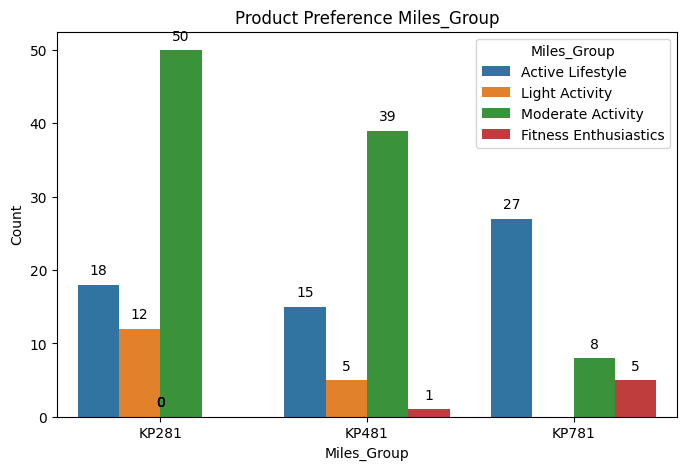

In [93]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(x='Product', y='Count', hue='Miles_Group', data=df7)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Miles_Group')
plt.ylabel('Count')
plt.title('Product Preference Miles_Group')
#plt.grid(axis='both', linestyle='--', alpha=0.5)


# Show the plot
plt.show()

#### Observations:

- Treadmill model KP781 is preferred more by customers planning to run 100 to 200 miles per week
- Both treadmill models, KP481 and KP281, are preferred more by customers planning to run 50 to 100 miles per week



Product Preferences over the Fitness

In [94]:
fitness=df['Fitness'].tolist()
fitness

df_fitness_grp=[]                                         # considering the Fitness levels Group As
for i in fitness:                                         # 1 = Poor
  if i ==1:                                                # 2 = Below Average
    df_fitness_grp.append('Poor')                         # 3 = Average
  elif i ==2 :                                              # 4 = Above Average
    df_fitness_grp.append('Below Average')                 # 5 = Excellent
  elif i ==3 :
    df_fitness_grp.append('Average')
  elif i== 4 :
    df_fitness_grp.append('Above Average')
  else:
    df_fitness_grp.append('Excellent')
df_fitness_grp

['Above Average',
 'Average',
 'Average',
 'Average',
 'Below Average',
 'Average',
 'Average',
 'Average',
 'Above Average',
 'Average',
 'Average',
 'Below Average',
 'Average',
 'Average',
 'Poor',
 'Average',
 'Average',
 'Average',
 'Average',
 'Below Average',
 'Average',
 'Average',
 'Average',
 'Excellent',
 'Average',
 'Below Average',
 'Average',
 'Average',
 'Average',
 'Below Average',
 'Average',
 'Above Average',
 'Below Average',
 'Average',
 'Above Average',
 'Average',
 'Below Average',
 'Average',
 'Average',
 'Above Average',
 'Average',
 'Below Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Below Average',
 'Average',
 'Above Average',
 'Average',
 'Below Average',
 'Below Average',
 'Above Average',
 'Average',
 'Below Average',
 'Average',
 'Excellent',
 'Below Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Above Average

In [95]:
fitness_grp=pd.DataFrame({'Product':df_product,'Fitness':fitness,'Fitness_grp':df_fitness_grp})
fitness_grp

,Product,Fitness,Fitness_grp
0,KP281,4,Above Average
1,KP281,3,Average
2,KP281,3,Average
3,KP281,3,Average
4,KP281,2,Below Average
...,...,...,...
175,KP781,5,Excellent
176,KP781,4,Above Average
177,KP781,5,Excellent
178,KP781,5,Excellent


In [96]:
df_comp=fitness_grp.groupby(['Product','Fitness_grp']).size().reset_index(name='Count') # To get cunt of customers for respective product Maritalstatus wise
df_comp

,Product,Fitness_grp,Count
0,KP281,Above Average,9
1,KP281,Average,54
2,KP281,Below Average,14
3,KP281,Excellent,2
4,KP281,Poor,1
5,KP481,Above Average,8
6,KP481,Average,39
7,KP481,Below Average,12
8,KP481,Poor,1
9,KP781,Above Average,7


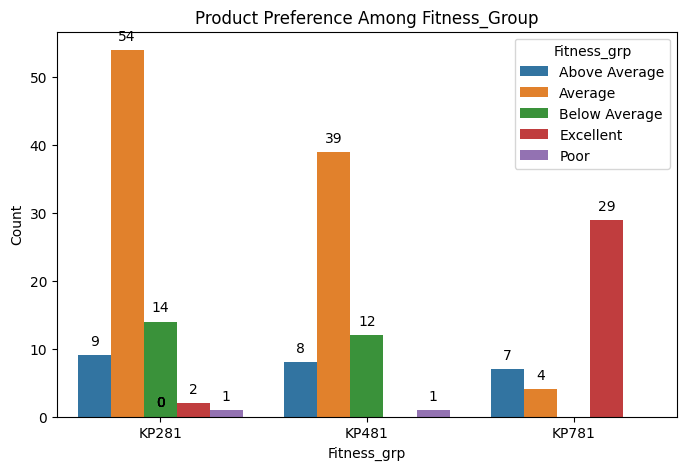

In [97]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(x='Product', y='Count', hue='Fitness_grp', data=df_comp)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Fitness_grp')
plt.ylabel('Count')
plt.title('Product Preference Among Fitness_Group')
#plt.grid(axis='both', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

####Observation:
- Users with self rated  Average fitness prefering KP281 and KP481.
- Users with self rated Excellent fitness prefering KP781.

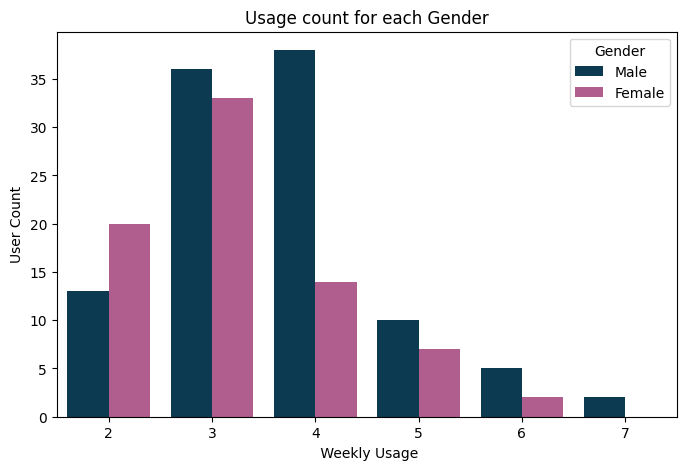

In [98]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'Usage', hue = 'Gender',order = sorted(df['Usage'].unique()), palette = ["#003f5c","#bc5090"],zorder = 2)
plt.title('Usage count for each Gender')
plt.xlabel(' Weekly Usage')
plt.ylabel('User Count')
plt.show()

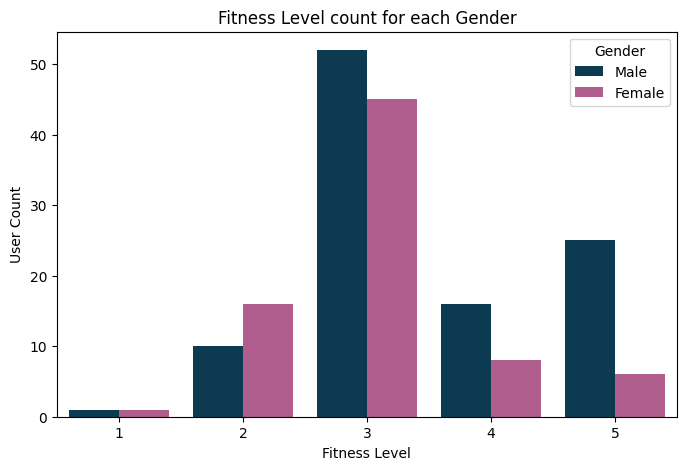

In [99]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'Fitness', hue = 'Gender',order = sorted(df['Fitness'].unique()), palette = ["#003f5c","#bc5090"],zorder = 2)
plt.title('Fitness Level count for each Gender')
plt.xlabel('Fitness Level')
plt.ylabel('User Count')
plt.show()

#### Observations:-
- Almost 70% of Female customers plan to use the treadmill for 2 to 3 times a week whereas almost 70% of Male customer plan to use the treadmill for 3 to 4 times a week.
- Almost 80% of Female customers rated themselves between 2 to 3 whereas almost 90% of Male customer rated themselves between 3 to 5 on the fitness scale.

 ## Correlation: Heatmaps, Pairplot

  ### Pairplot

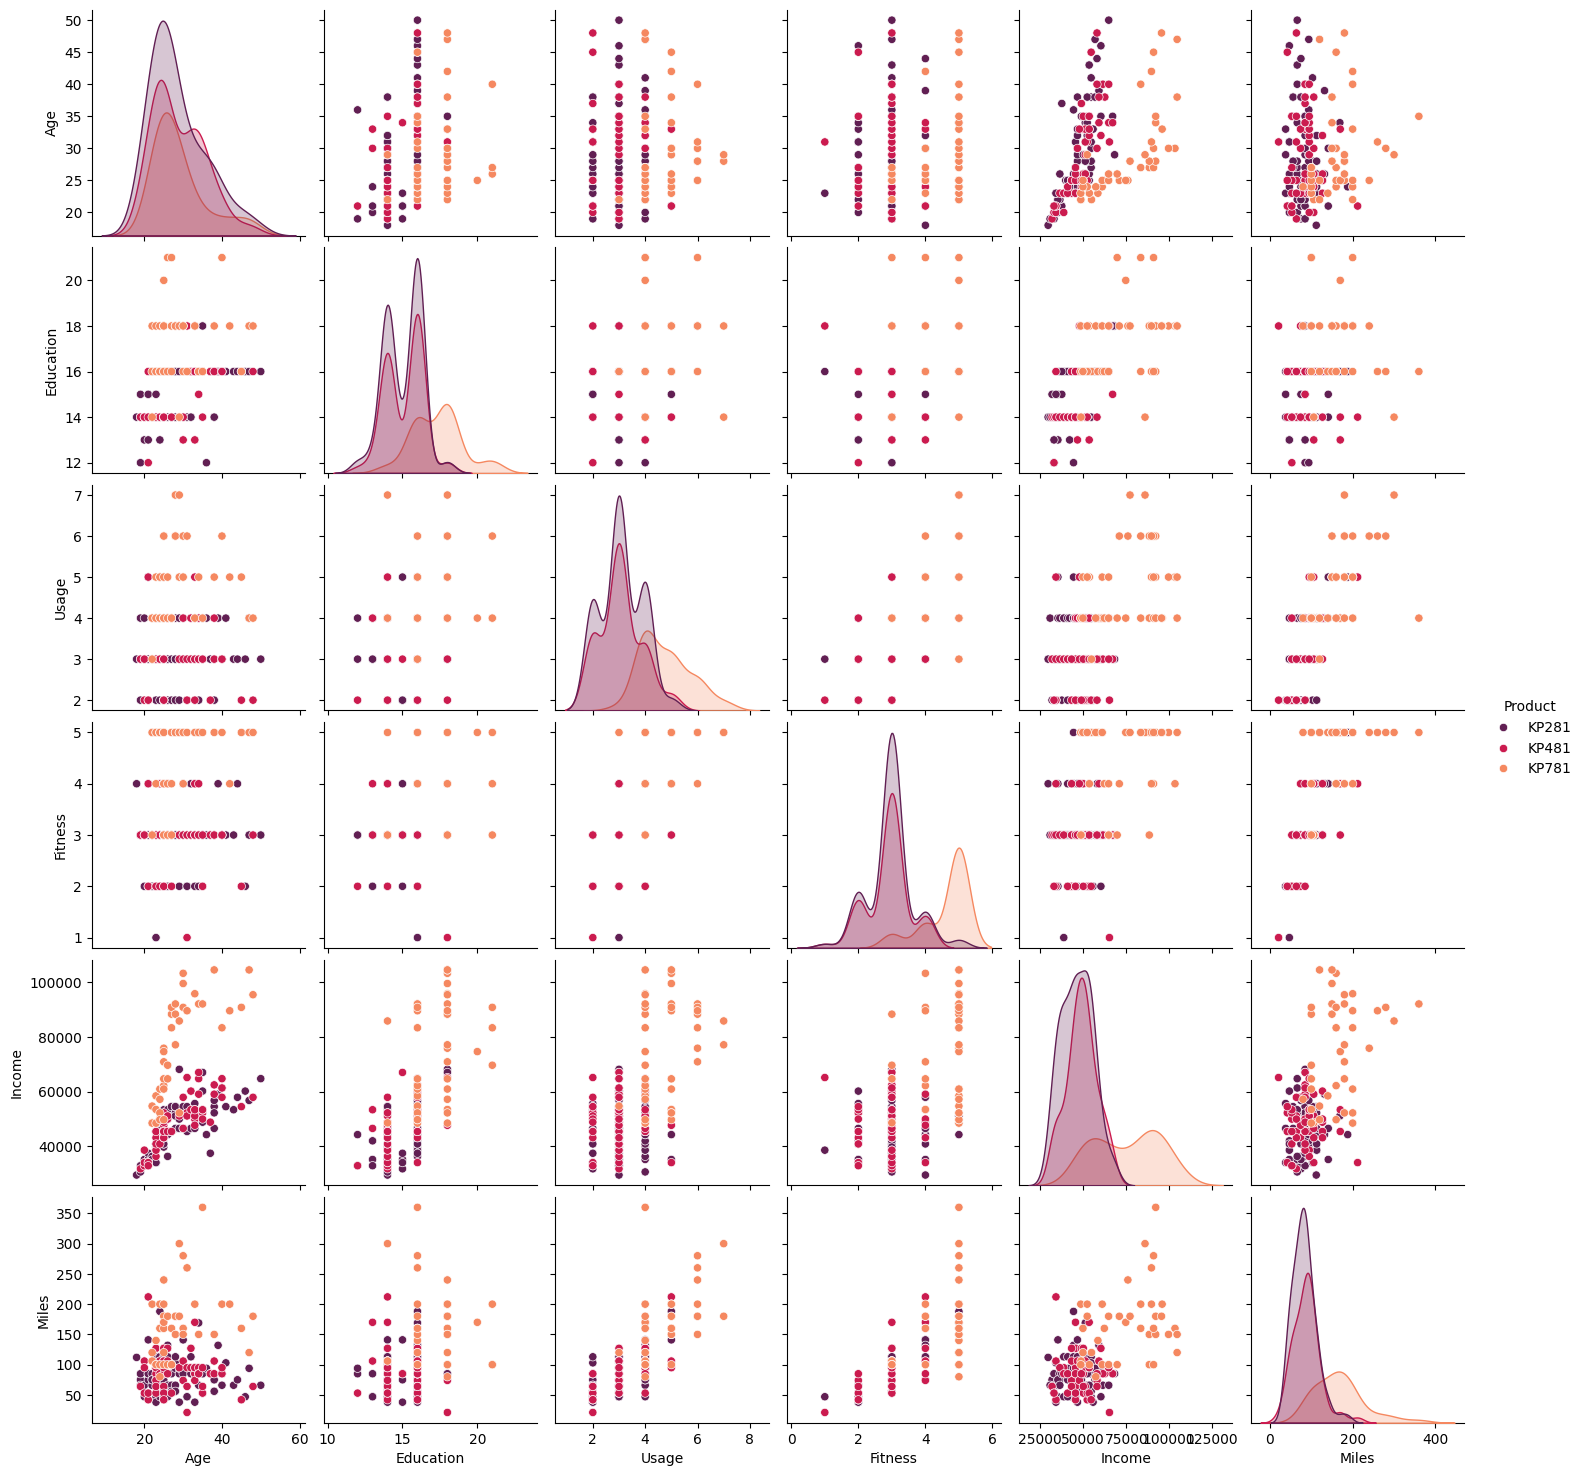

In [100]:
import copy
df_copy = copy.deepcopy(df)
sns.pairplot(df_copy, hue ='Product', palette= 'rocket')
plt.show()

##Heatmap

In [101]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age_group      180 non-null    category
dtypes: category(1), int64(6), object(3)
memory usage: 13.2+ KB


In [102]:
# as few of the atributes are object type convert them into int type for plotting the heatmap

In [103]:
df_copy['Usage'] = df_copy['Usage'].astype('int')
df_copy['Fitness'] = df_copy['Fitness'].astype('int')

<ipython-input-104-a30b1a555622>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_copy.corr()


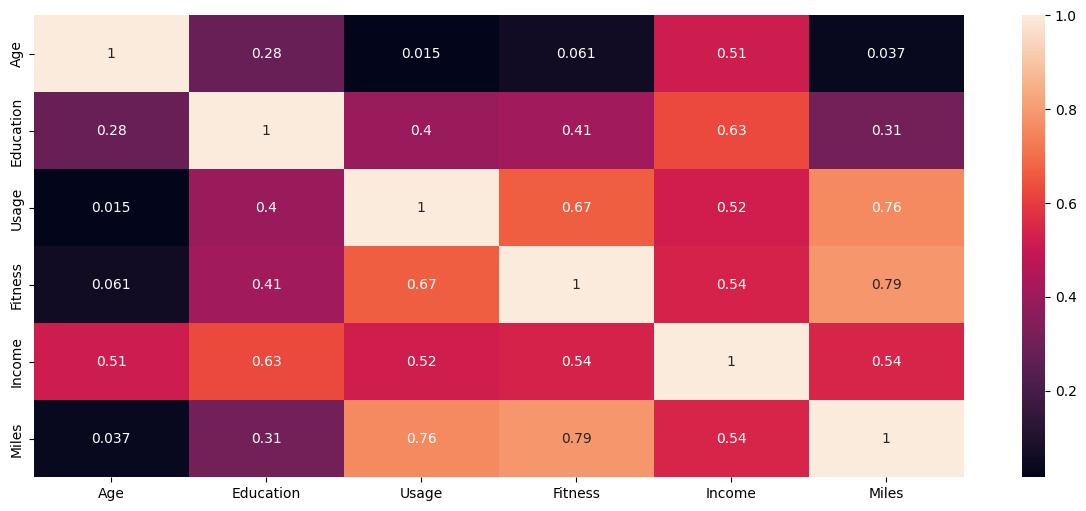

In [104]:
corr_mat = df_copy.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_mat,annot = True, cmap="rocket")
plt.show()

### Observations:
- From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them
- Eductaion and Income are highly correlated as its obvious.
- Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.
Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

# Missing Value & Outlier Detection

In [105]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
age_group        0
dtype: int64

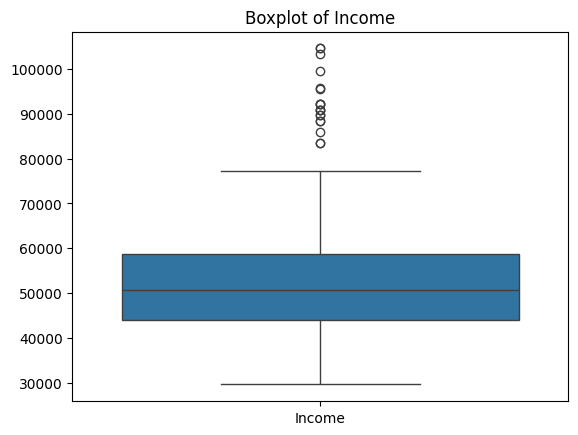

In [106]:
sns.boxplot(data=df[['Income']])
plt.title('Boxplot of Income')
plt.show()


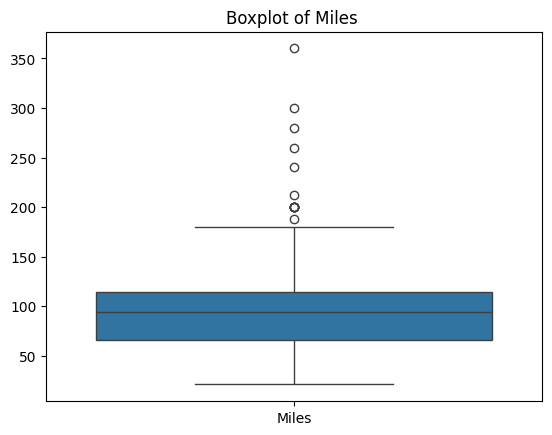

In [107]:
sns.boxplot(data=df[['Miles']])
plt.title('Boxplot of Miles ')
plt.show()

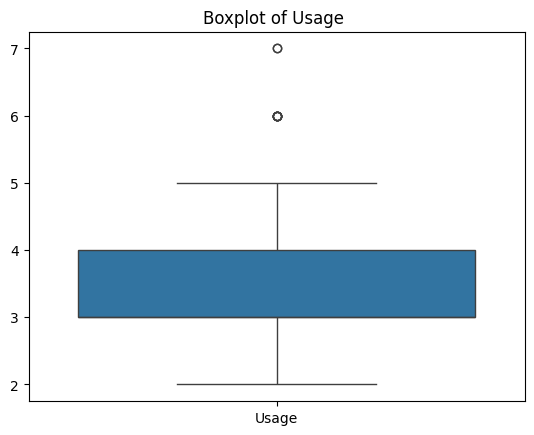

In [108]:
sns.boxplot(data=df[['Usage']])
plt.title('Boxplot of Usage ')
plt.show()

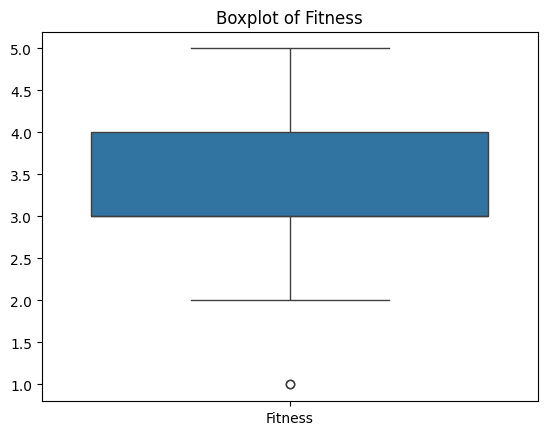

In [109]:
sns.boxplot(data=df[['Fitness']])
plt.title('Boxplot of Fitness')
plt.show()


### Computing  the Probability- conditional probability.marginal probability like
- Question: what percent of customers have purchased KP281, KP481, or KP781?

In [110]:
# Probability of product purchase w.r.t. gender

In [111]:
# pandas. crosstab () function is used to compute the probability i.e. it  can show the frequency with which certain groups of data appear
# pd.crosstab is a function in the pandas library that computes a cross-tabulation of two or more factors. It is a
# useful tool for analyzing the relationship between two or more categorical variables.

pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


### Observations:-

- The Probability of a treadmill being purchased by a female is 42%.

- The conditional probability of purchasing the treadmill model given that the customer is female is
  - For Treadmill model KP281 - 22%

  - For Treadmill model KP481 - 16%

  - For Treadmill model KP781 - 4%

- The Probability of a treadmill being purchased by a male is 58%.

- The conditional probability of purchasing the treadmill model given that the customer is male is -

  - For Treadmill model KP281 - 22%

  - For Treadmill model KP481 - 17%

  - For Treadmill model KP781 - 18%

In [112]:
# Probability of product purchase w.r.t. Age

In [113]:
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adult,Adult,Middle Aged Adult,Elder,All
Product,,,,,
KP281,0.15,0.20,0.08,0.02,0.44
KP481,0.09,0.17,0.06,0.01,0.33
KP781,0.06,0.13,0.02,0.02,0.22
All,0.30,0.50,0.16,0.04,1.00


### Observations:-

- The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

- The conditional probability of purchasing the treadmill model given that the customer is Young Adult is

  - For Treadmill model KP281 - 19%

  - For Treadmill model KP481 - 16%

  - For Treadmill model KP781 - 9%

- The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

- The conditional probability of purchasing the treadmill model given that the customer is Adult is -

  - For Treadmill model KP281 - 18%

  - For Treadmill model KP481 - 13%

  - For Treadmill model KP781 - 9%

- The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.
- The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

In [114]:
# Probability of product purchase w.r.t. Income

In [115]:
df_income_prob=df
df_income_prob.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult


In [116]:

# Define bin ranges and labels for income levels
bin_range_income = [0, 40000, 60000, 80000, float('inf')]
bin_labels_income = ['Low_Income', 'Moderate_Income', 'High_Income', 'Very_High_Income']

# Add a new column 'Income_Group' based on income levels
df['Income_Group'] = pd.cut(df_income_prob['Income'], bins=bin_range_income, labels=bin_labels_income, right=False)  # this is to add a  column in dataframe.

# Display the updated DataFrame
df_income_prob.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,Income_Group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult,Low_Income
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult,Low_Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult,Low_Income
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult,Low_Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult,Low_Income


In [117]:
pd.crosstab(index =df_income_prob['Product'],columns = df_income_prob['Income_Group'],margins = True,normalize = True ).round(2)

Income_Group,Low_Income,Moderate_Income,High_Income,Very_High_Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


## Observations:

- The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

- The conditional probability of purchasing the treadmill model given that the customer has Low Income is -

  - For Treadmill model KP281 - 13%

  - For Treadmill model KP481 - 5%

  - For Treadmill model KP781 - 0%

- The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

- The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is -

  - For Treadmill model KP281 - 28%

  - For Treadmill model KP481 - 24%

  - For Treadmill model KP781 - 6%

- The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

- The conditional probability of purchasing the treadmill model given that the customer has High Income is -

  - For Treadmill model KP281 - 3%

  - For Treadmill model KP481 - 4%

  - For Treadmill model KP781 - 6%

- The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

- The conditional probability of purchasing the treadmill model given that the customer has High Income is -

  - For Treadmill model KP281 - 0%

  - For Treadmill model KP481 - 0%

  - For Treadmill model KP781 - 11%

In [118]:
# Probability of product purchase w.r.t. Marital Status

In [119]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


## Observations:
- The Probability of a treadmill being purchased by a Married Customer is 59%.

- The conditional probability of purchasing the treadmill model given that the customer is Married is

  - For Treadmill model KP281 - 27%

  - For Treadmill model KP481 - 20%

  - For Treadmill model KP781 - 13%

- The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

- The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -

  - For Treadmill model KP281 - 18%

  - For Treadmill model KP481 - 13%
  - For Treadmill model KP781 - 9%



In [120]:
# Probability of product purchase w.r.t. Weekly Usage

In [121]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


## Observations:
- The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

- The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is -

  - For Treadmill model KP281 - 21%

  - For Treadmill model KP481 - 17%

  - For Treadmill model KP781 - 1%

- The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

- The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is -

  - For Treadmill model KP281 - 12%

  - For Treadmill model KP481 - 7%

  - For Treadmill model KP781 - 10%

- The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

- The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is -

  - For Treadmill model KP281 - 11%

  - For Treadmill model KP481 - 8%

  - For Treadmill model KP781 - 0%

In [122]:
# Probability of product purchase w.r.t. Customer Fitness

In [123]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


## Observations:
- The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

- The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -

  - For Treadmill model KP281 - 30%

  - For Treadmill model KP481 - 22%

  - For Treadmill model KP781 - 2%

- The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.
The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

In [124]:
# Probability of product purchase w.r.t. weekly mileage

In [125]:
pd.crosstab(index =Product_Miles['Product'],columns = Product_Miles['Miles_Group'],margins = True,normalize = True ).round(2)

Miles_Group,Active Lifestyle,Fitness Enthusiastics,Light Activity,Moderate Activity,All
Product,,,,,
KP281,0.10,0.00,0.07,0.28,0.44
KP481,0.08,0.01,0.03,0.22,0.33
KP781,0.15,0.03,0.00,0.04,0.22
All,0.33,0.03,0.09,0.54,1.00


## Observations:-
- The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

- The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is -

  - For Treadmill model KP281 - 7%

  - For Treadmill model KP481 - 3%

  - For Treadmill model KP781 - 0%

- The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

- The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is -

  - For Treadmill model KP281 - 28%

  - For Treadmill model KP481 - 22%

  - For Treadmill model KP781 - 4%

- The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

- The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is -

  - For Treadmill model KP281 - 10%

  - For Treadmill model KP481 - 8%

  - For Treadmill model KP781 - 15%

- The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only

# Customer Profiling

## Based on above analysis

- Probability of purchase of KP281 = 44%
- Probability of purchase of KP481 = 33%
- Probability of purchase of KP781 = 22%


- `Customer Profile` for `KP281` Treadmill:

    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer below USD 60,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 100 miles
    
    
- `Customer Profile` for `KP481` Treadmill:

    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer between USD 40,000 to USD 80,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 200 miles


- `Customer Profile` for `KP781` Treadmill:

    - Gender - Male
    - Age of customer between 18 to 35 years
    - Education level of customer 15 years and above
    - Annual Income of customer USD 80,000 and above
    - Weekly Usage - 4 to 7 times
    - Fitness Scale - 3 to 5
    - Weekly Running Mileage - 100 miles and above

# Business Insights based on Non-Graphical and Visual Analysis

##Non-Graphical Analysis:

- 1. It is clear from the dataset that there are only 3 different types of trademills sold here.
- 2. The age customers using the trademill varies from 18 Years to 50 Years. Average customer/user age is 29 years.Most of the customers are of young ages.
- 3. Around 44 % customers/users are of age <= 25 Years i.e. Youth population, around 50 % customers/users are Adults (i.e. in the age ragne above 25 to 40), around only 6 % customers are middle aged ( i.e. above 40).
- 4. It is observed that the customer/user numbers are decreased comparing with increase in age.  So Majority of customers are Youth and Adults.
- 5. Around 60 % customers/users who bought trademill are married.
- 6. Around 58 % customers/users are Men.
- 7. Around 53 % customers/users have Averge fitness as per self assessment i.e. they may habve good endurance, healthy cardiovascular function, decent strength and flexibility, and engage in a variety of physical activities. May be thse customers are health concious and may be aiming to keep themselfes healthy and fit.
- 8. Around 17 % customers/users have High Fitness as per self assessment. They have Exceptional endurance, Outstanding cardiovascular health, Superior strength and flexibility and  perform at an elite level in various physical activities.  May be these customers are highly health concious , fitness enthuastics, they may be from some sports background where they are expecting to build and keep excellent physcial fitness.  These cusotmers may be consider as Elite customers if they are found buyers of the Advanced feature Trademill.
- 9. Around 38 % customers/users which is max count, planed to use the trademill trice a week. That is maximum customers plan to use the trademill 3 times a week.
- 10.  Around 15 % people (this is max count) expected to complete average 85 Miles walk/run each week.
- 11.  There are very few customers/users expected to complete above 200 miles walk/run each week.
- 12. Around 18 % customers are from Lower Income slab (Income < = 40K)
- 13. Around 59 % customers are from Middle Income ( With starting Range 40K to 60K) slab.
- 14. Around 17 % customers are from Middle Income (With higher Range 60K to 90K )
- 15. Only 7 % customers are from High Income slab.

## Visual Analysis:-
###Product Sales Distribution
- The KP281 treadmill model, positioned as an entry-level product, has the highest number of units sold, trailed by the KP481 (mid-level) and KP781 (advanced) models.
- All three models have nearly equal contributions in terms of generating sales revenue.

###Gender and Marital Status Disribution

-  Among the buyers 58 % are Male and 42 % ae Female buyers.
-  59 % buyers are Married and 41 % buyers are single.
-  For every product type Married buyers are more compared to singles.
-  Product KP281( Entry Level) is equally liked by Men and Womens buyers.
-  Product KP481( Mid range) is more liked by Male customers.
-  Product KP781( Advanced ) is highly appreciated by the Male customers. 0.82 is the probability of buying KP781 by Male users.
-  For Advanced feature product KP781, womens buyers are very less.

###Fitness and Treadmill Usage
- Almost 85% of the customers plan to use the treadmill for 2 to 4 times a week and only 15% using 5 times and above each week
54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5.
- Furthermore, a substantial 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.

### Customer Age Distribution
- 80% of the customers fall in the age range of 18 to 35. with a median age of 26, suggesting young people showing more interest in the companies products

###Customer Income Distribution
- Almost 60% of the customers fall in the income group of (40k to 60k) dollars suggesting higher inclination of this income group people towards the products.
- Surprisingly 18% of the customers fall in the income group of (<40) suggesting almost 77% of the total customers fall in income group of below 60k and only 23% of them falling in 60k and above income grou

###Customers Expected Weekly Mileage
- Almost 88% of the customers plans to use the treadmill for 50 to 200 miles per week with a median of 94 miles per week.

###Product Type Analysis
- The analysis presented above clearly indicates a strong preference for the treadmill model KP781 among customers who are having higher income levels, and intend to engage in running activities exceeding 150 miles per week.

###Product Preferences Across Gender and Marital Status
- Treadmills are preferred by the Adults in all three product segments

###Product Preference Across Income Group
- Treadmill model KP781 is preferred more by customers with Very High Income.
- Both treadmill models, KP481 and KP281, are preferred more by customers with Moderate Income.

###Product preference across customer weekly mileage
- Treadmill model KP781 is preferred more by customers planning to run 100 to 200 miles per week
- Both treadmill models, KP481 and KP281, are preferred more by customers planning to run 50 to 100 miles per week

###Product Preferences over the Fitness
- Users with self rated  Average fitness prefering KP281 and KP481.
- Users with self rated Excellent fitness prefering KP781.
- Almost 70% of Female customers plan to use the treadmill for 2 to 3 times a week whereas almost 70% of Male customer plan to use the treadmill for 3 to 4 times a week.
- Almost 80% of Female customers rated themselves between 2 to 3 whereas almost 90% of Male customer rated themselves between 3 to 5 on the fitness scale.

### Corelation Observations
- From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them
- Eductaion and Income are highly correlated as its obvious.
- Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.
Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

### Probability Based Insights
#### For Gender:
  - The Probability of a treadmill being purchased by a female is 42%.

- The conditional probability of purchasing the treadmill model given that the customer is female is
  - For Treadmill model KP281 - 22%

  - For Treadmill model KP481 - 16%

  - For Treadmill model KP781 - 4%

- The Probability of a treadmill being purchased by a male is 58%.

- The conditional probability of purchasing the treadmill model given that the customer is male is -

  - For Treadmill model KP281 - 22%

  - For Treadmill model KP481 - 17%

  - For Treadmill model KP781 - 18%

#### For Age:
  The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

- The conditional probability of purchasing the treadmill model given that the customer is Young Adult is

  - For Treadmill model KP281 - 19%

  - For Treadmill model KP481 - 16%

  - For Treadmill model KP781 - 9%

- The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

- The conditional probability of purchasing the treadmill model given that the customer is Adult is -

  - For Treadmill model KP281 - 18%

  - For Treadmill model KP481 - 13%

  - For Treadmill model KP781 - 9%

- The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.
- The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

#### For Income
- The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

- The conditional probability of purchasing the treadmill model given that the customer has Low Income is -

  - For Treadmill model KP281 - 13%

  - For Treadmill model KP481 - 5%

  - For Treadmill model KP781 - 0%

- The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

- The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is -

  - For Treadmill model KP281 - 28%

  - For Treadmill model KP481 - 24%

  - For Treadmill model KP781 - 6%

- The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

- The conditional probability of purchasing the treadmill model given that the customer has High Income is -

  - For Treadmill model KP281 - 3%

  - For Treadmill model KP481 - 4%

  - For Treadmill model KP781 - 6%

- The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

- The conditional probability of purchasing the treadmill model given that the customer has High Income is -

  - For Treadmill model KP281 - 0%

  - For Treadmill model KP481 - 0%

  - For Treadmill model KP781 - 11%

#### For Marital Status
- The Probability of a treadmill being purchased by a Married Customer is 59%.

- The conditional probability of purchasing the treadmill model given that the customer is Married is

  - For Treadmill model KP281 - 27%

  - For Treadmill model KP481 - 20%

  - For Treadmill model KP781 - 13%

- The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

- The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -

  - For Treadmill model KP281 - 18%

  - For Treadmill model KP481 - 13%
  - For Treadmill model KP781 - 9%

#### For Weekly Usase
- The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

- The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is -

  - For Treadmill model KP281 - 21%

  - For Treadmill model KP481 - 17%

  - For Treadmill model KP781 - 1%

- The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

- The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is -

  - For Treadmill model KP281 - 12%

  - For Treadmill model KP481 - 7%

  - For Treadmill model KP781 - 10%

- The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

- The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is -

  - For Treadmill model KP281 - 11%

  - For Treadmill model KP481 - 8%

  - For Treadmill model KP781 - 0%

####For Customer Fitness
- The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

- The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -

  - For Treadmill model KP281 - 30%

  - For Treadmill model KP481 - 22%

  - For Treadmill model KP781 - 2%

- The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.
The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

#### For Weekly Milage
 The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

- The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is -

  - For Treadmill model KP281 - 7%

  - For Treadmill model KP481 - 3%

  - For Treadmill model KP781 - 0%

- The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

- The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is -

  - For Treadmill model KP281 - 28%

  - For Treadmill model KP481 - 22%

  - For Treadmill model KP781 - 4%

- The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

- The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is -

  - For Treadmill model KP281 - 10%

  - For Treadmill model KP481 - 8%

  - For Treadmill model KP781 - 15%

- The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only



# Recommendations:
**Affordable Pricing and Payment Plans**

- Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets.

**User-Friendly App Integration**

- Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This  can enhance the overall treadmill experience and keep users engaged.

**Product Sales Strategy**

- The KP281 treadmill model, being an entry-level product, has high sales. Consider offering special promotions or bundle deals for this model to attract more customers.
- For the mid-level KP481 and advanced KP781 models, focus on marketing their unique features to appeal to specific target audiences.

**Target Audience**

- Tailor marketing efforts towards the 18 to 35 age group, as they constitute 80% of customers.
- Consider creating targeted campaigns for both married and single customers, with a focus on the preferences observed in each group.

**Product Preferences**

- The KP781 model is preferred by customers with higher income levels. Consider highlighting its advanced features and benefits in marketing materials targeting customers with Very High Income.
- For the KP481 and KP281 models, emphasize their features that cater to customers with Moderate Income.

**Fitness and Usage**
- Since the majority of customers plan to use the treadmill 2 to 4 times a week, consider offering personalized workout plans or challenges to encourage more frequent usage.
- Given the correlation between usage and fitness, promote the health and fitness benefits of using the treadmill regularly.

**Income-Based Offers**
- Create income-specific promotions or discounts, especially for the Low Income group, to increase their likelihood of purchasing.
- Design premium packages or extended warranties for the Very High Income group, emphasizing the durability and advanced features of the products.

**Marketing Strategies**
- Leverage gender-specific marketing messages, highlighting features that appeal to each gender. For example, emphasize the convenience of at-home workouts for busy individuals or the advanced training capabilities for fitness enthusiasts.
- Develop marketing materials that align with the preferred product types for different genders, marital statuses, and age groups.
- The KP781 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.


**Customer Engagement**
- Implement loyalty programs or referral incentives to encourage existing customers to refer the products to friends and family.
- Gather feedback from customers with Very High Income to understand specific features or services that would enhance their experience.

**Educational Content**
- Provide educational content on the benefits of regular treadmill usage, targeting customers with lower fitness ratings to encourage healthier lifestyles.
- Offer online resources and tutorials for optimizing the use of advanced features on the KP781 model.

**Promotional Events**
- Organize promotional events or campaigns at different commercial spaces, collaborating with the Gyms and Fitness Institutes, targeting customers with Active Lifestyles, showcasing the durability and performance capabilities of the treadmills under high mileage conditions.

**Inventory Management**
- Ensure sufficient stock of the KP281 model to meet the demand driven by its popularity.
- Monitor sales trends and adjust inventory levels for the KP481 and KP781 models accordingly.